In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  5 11:09:06 2024

@author: NAWri
"""

import pandas as pd
from geopy.distance import geodesic

# NBA cities and their approximate coordinates (latitude, longitude)
nba_cities = {
    "Atlanta": (33.7490, -84.3880),
    "Boston": (42.3601, -71.0589),
    "Brooklyn": (40.6782, -73.9442),
    "Charlotte": (35.2271, -80.8431),
    "Chicago": (41.8781, -87.6298),
    "Cleveland": (41.4993, -81.6944),
    "Dallas": (32.7767, -96.7970),
    "Denver": (39.7392, -104.9903),
    "Detroit": (42.3314, -83.0458),
    "Golden State": (37.8044, -122.2711),  # Oakland (near Chase Center in San Francisco)
    "Houston": (29.7604, -95.3698),
    "Indiana": (39.7684, -86.1581),
    "LA Clippers": (34.0522, -118.2437),
    "LA Lakers": (34.0522, -118.2437),
    "Memphis": (35.1495, -90.0490),
    "Miami": (25.7617, -80.1918),
    "Milwaukee": (43.0389, -87.9065),
    "Minnesota": (44.9778, -93.2650),
    "New Orleans": (29.9511, -90.0715),
    "New York": (40.7128, -74.0060),
    "Oklahoma City": (35.4676, -97.5164),
    "Orlando": (28.5383, -81.3792),
    "Philadelphia": (39.9526, -75.1652),
    "Phoenix": (33.4484, -112.0740),
    "Portland": (45.5152, -122.6784),
    "Sacramento": (38.5816, -121.4944),
    "San Antonio": (29.4241, -98.4936),
    "Toronto": (43.6510, -79.3470),
    "Utah": (40.7608, -111.8910),
    "Washington": (38.9072, -77.0369)
}

# Helper function to calculate flight time (approx. 500 mph = 805 km/h)
def flight_time(city1, city2):
    distance_km = geodesic(city1, city2).kilometers
    flight_time_hours = distance_km / 805  # assuming average flight speed
    return round(flight_time_hours * 60)  # convert to minutes

# Initialize a DataFrame to store flight times
city_names = list(nba_cities.keys())
flight_times = pd.DataFrame(index=city_names, columns=city_names)

# Calculate flight times between cities
for city1, coord1 in nba_cities.items():
    for city2, coord2 in nba_cities.items():
        if city1 == city2:
            flight_times.loc[city1, city2] = 0  # Same city
        elif (city1 == "New York" and city2 == "Brooklyn") or (city1 == "Brooklyn" and city2 == "New York"):
            flight_times.loc[city1, city2] = 0  # Set New York <-> Brooklyn travel time to 0
        elif (city1 == "LA Lakers" and city2 == "LA Clippers") or (city1 == "LA Clippers" and city2 == "LA Lakers"):
            flight_times.loc[city1, city2] = 0  # Set LA Lakers <-> LA Clippers travel time to 0
        else:
            flight_times.loc[city1, city2] = flight_time(coord1, coord2)

# Save DataFrame to file path as csv
flight_times.to_csv("nba_flight_times.csv")



In [2]:
import pandas as pd

game = pd.read_csv("nba_games_stats_2.csv") 
columns = game[['Team', 'Game', 'Date', 'Home', 'Opponent']]

print(columns)


     Team  Game        Date  Home Opponent
0     ATL     1  2014-10-29  Away      TOR
1     ATL     2  2014-11-01  Home      IND
2     ATL     3  2014-11-05  Away      SAS
3     ATL     4  2014-11-07  Away      CHO
4     ATL     5  2014-11-08  Home      NYK
...   ...   ...         ...   ...      ...
9835  WAS    78  2018-04-03  Away      HOU
9836  WAS    79  2018-04-05  Away      CLE
9837  WAS    80  2018-04-06  Home      ATL
9838  WAS    81  2018-04-10  Home      BOS
9839  WAS    82  2018-04-11  Away      ORL

[9840 rows x 5 columns]


In [3]:
import pandas as pd

# Assuming you have already loaded the game_df

team_mapping = {
    'ATL': 'Atlanta',
    'BOS': 'Boston',
    'BRK': 'Brooklyn',
    'CHO': 'Charlotte',
    'CHI': 'Chicago',
    'CLE': 'Cleveland',
    'DAL': 'Dallas',
    'DEN': 'Denver',
    'DET': 'Detroit',
    'GSW': 'Golden State',
    'HOU': 'Houston',
    'IND': 'Indiana',
    'LAC': 'LA Clippers',
    'LAL': 'LA Lakers',
    'MEM': 'Memphis',
    'MIA': 'Miami',
    'MIL': 'Milwaukee',
    'MIN': 'Minnesota',
    'NOP': 'New Orleans',
    'NYK': 'New York',
    'OKC': 'Oklahoma City',
    'ORL': 'Orlando',
    'PHI': 'Philadelphia',
    'PHX': 'Phoenix',
    'POR': 'Portland',
    'SAC': 'Sacramento',
    'SAS': 'San Antonio',
    'TOR': 'Toronto',
    'UTA': 'Utah',
    'WAS': 'Washington'
}

game['Full_Team'] = game['Team'].map(team_mapping)
game['Full_Opponent'] = game['Opponent'].map(team_mapping)

game.to_csv('updated_nba_games_stats_with_full_names.csv', index=False)


In [4]:
import pandas as pd

distance_df = pd.read_csv('nba_flight_times.csv', index_col=0) 

def assign_distance(row):
    team = row['Full_Team']
    opponent = row['Full_Opponent']
    
    if row['Home'] == 'Home':
        return 0
    if team in distance_df.index and opponent in distance_df.columns:
        return distance_df.at[team, opponent] 

game['Distance'] = game.apply(assign_distance, axis=1)

game.to_csv("updated_game_data.csv", index=False)



C:\Users\bootcamp\AppData\Local\Temp\ipykernel_17436\1443586379.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df_2018['Offensive Rating'] = (game_df_2018['TeamPoints'] / game_df_2018['FieldGoalsAttempted']) * 100
C:\Users\bootcamp\AppData\Local\Temp\ipykernel_17436\1443586379.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df_2018['Defensive Rating'] = (game_df_2018['OpponentPoints'] / game_df_2018['Opp.FieldGoalsAttempted']) * 100
C:\Users\bootcamp\AppData\Local\Temp\ipykernel_17436\1

Regression results for Atlanta (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.507
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.234
Time:                        14:08:09   Log-Likelihood:                 15.710
No. Observations:                  22   AIC:                            -27.42
Df Residuals:                      20   BIC:                            -25.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

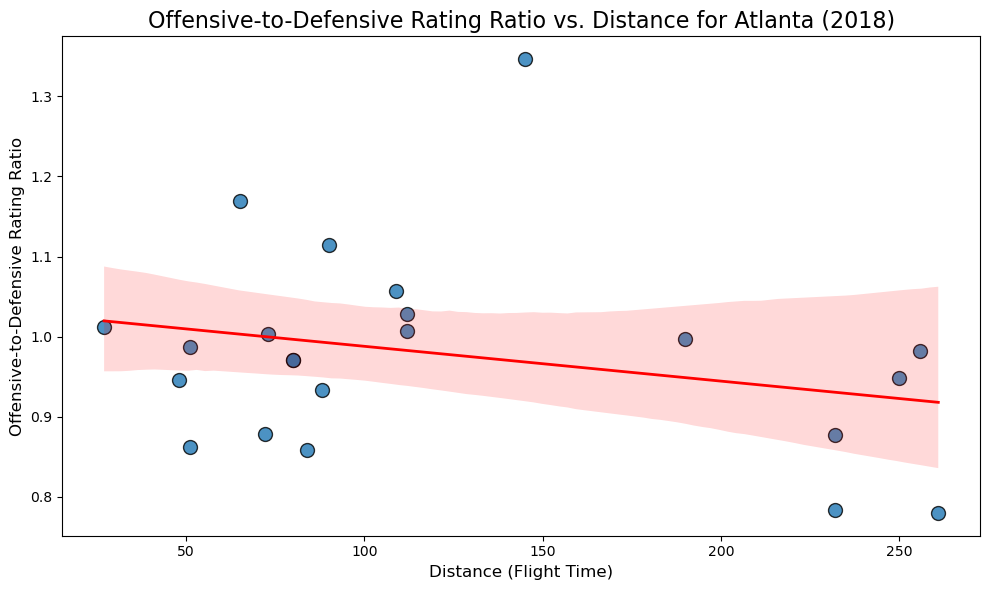

Regression results for Boston (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.5884
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.452
Time:                        14:08:09   Log-Likelihood:                 12.327
No. Observations:                  21   AIC:                            -20.65
Df Residuals:                      19   BIC:                            -18.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

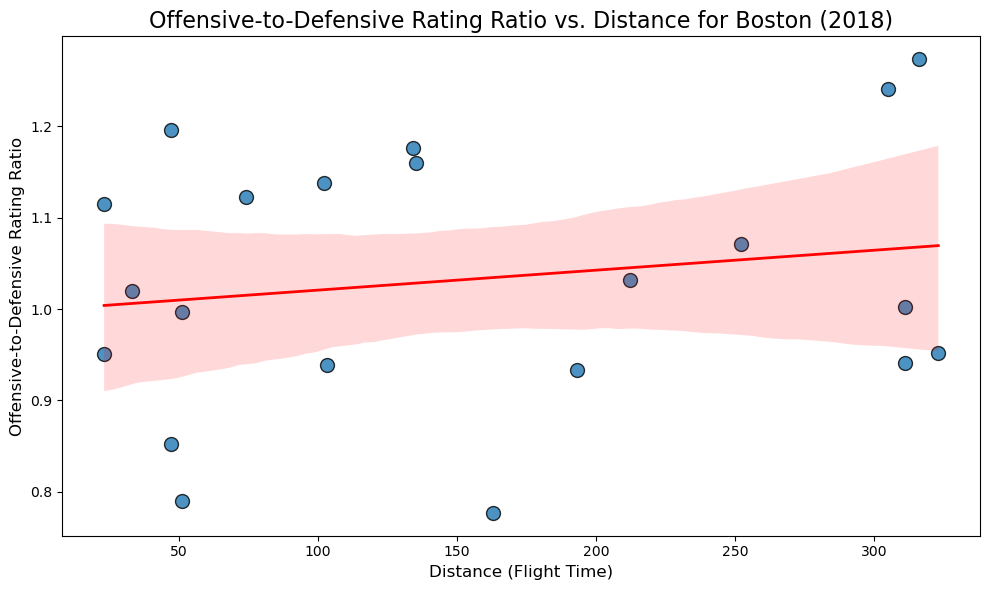

Regression results for Brooklyn (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.2969
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.592
Time:                        14:08:10   Log-Likelihood:                 11.398
No. Observations:                  21   AIC:                            -18.80
Df Residuals:                      19   BIC:                            -16.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

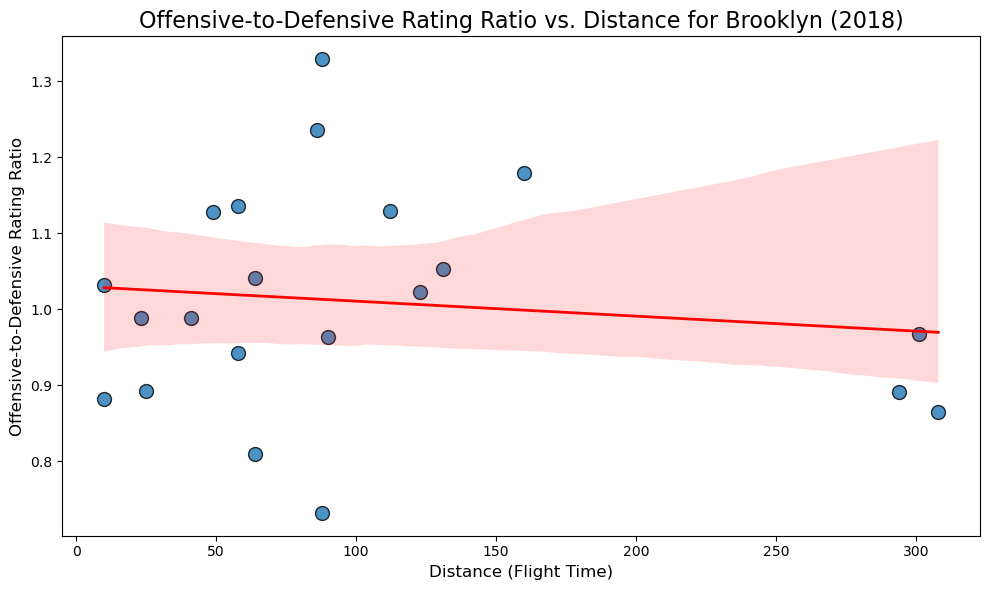

Regression results for Charlotte (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.4388
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.515
Time:                        14:08:10   Log-Likelihood:                 11.405
No. Observations:                  24   AIC:                            -18.81
Df Residuals:                      22   BIC:                            -16.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

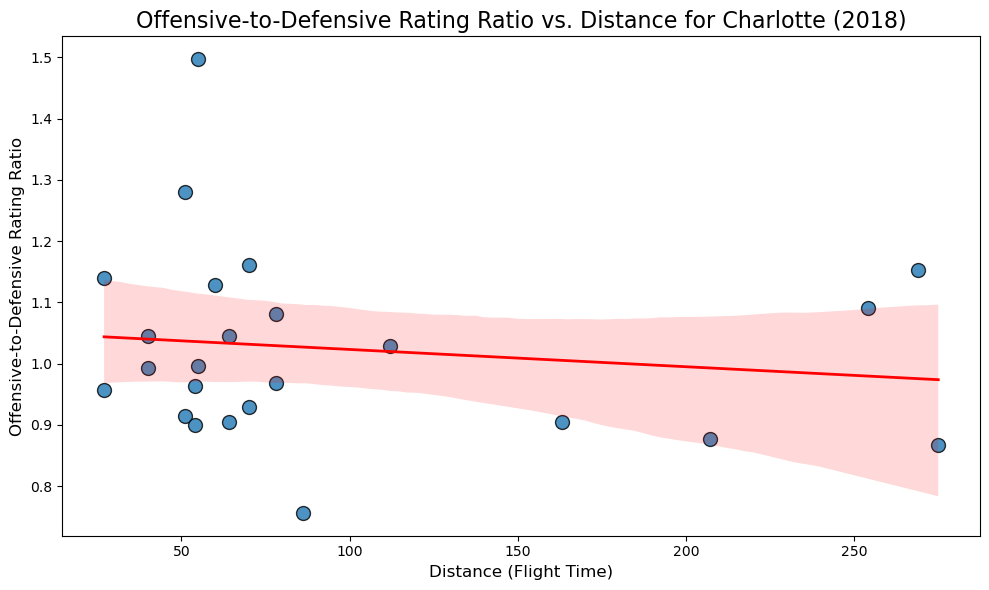

Regression results for Chicago (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                  0.008303
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.928
Time:                        14:08:11   Log-Likelihood:                 6.5300
No. Observations:                  22   AIC:                            -9.060
Df Residuals:                      20   BIC:                            -6.878
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

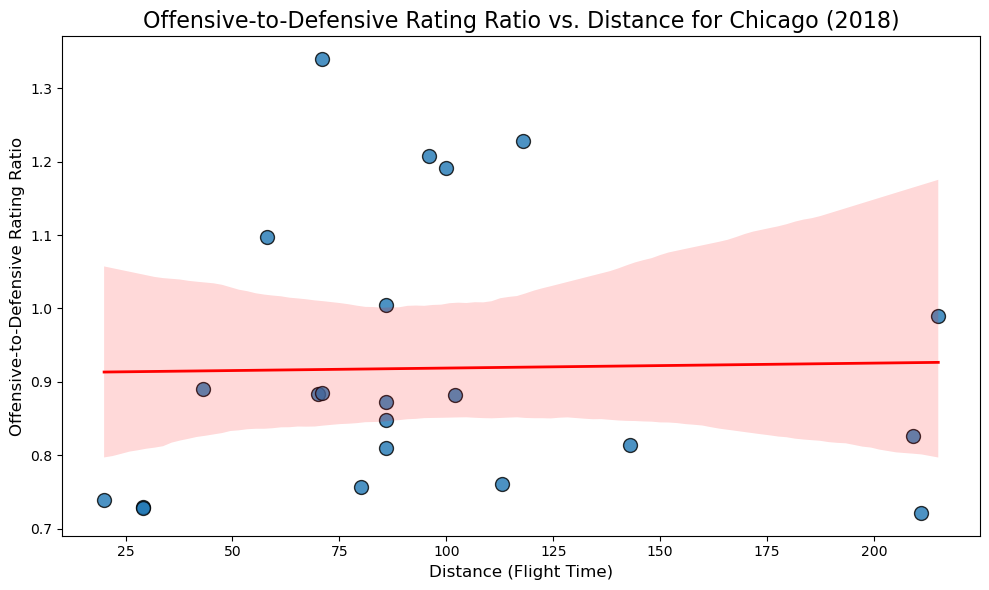

Regression results for Cleveland (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.1976
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.661
Time:                        14:08:11   Log-Likelihood:                 13.971
No. Observations:                  22   AIC:                            -23.94
Df Residuals:                      20   BIC:                            -21.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

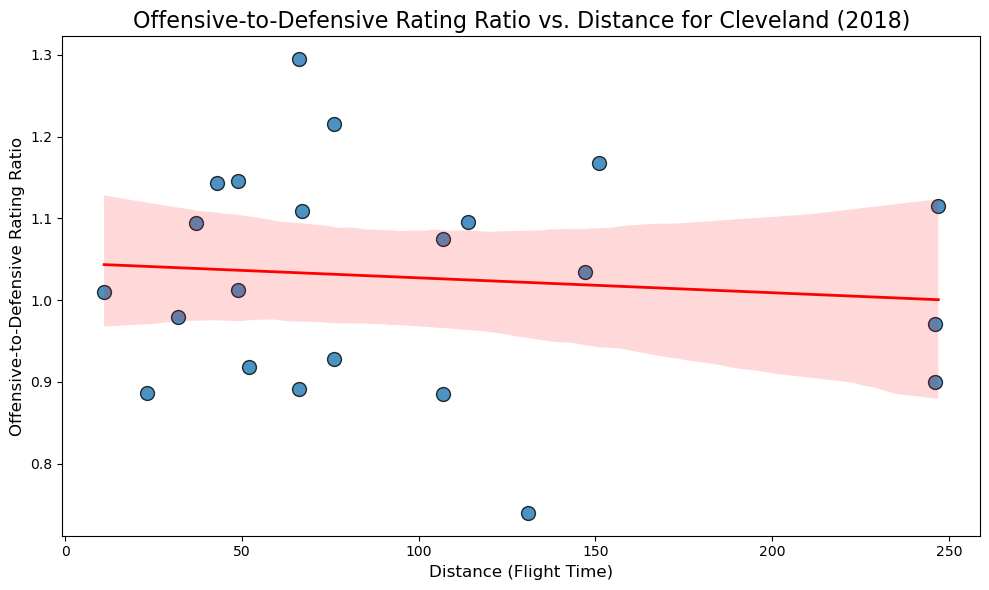

Regression results for Dallas (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.6932
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.415
Time:                        14:08:11   Log-Likelihood:                 17.898
No. Observations:                  21   AIC:                            -31.80
Df Residuals:                      19   BIC:                            -29.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

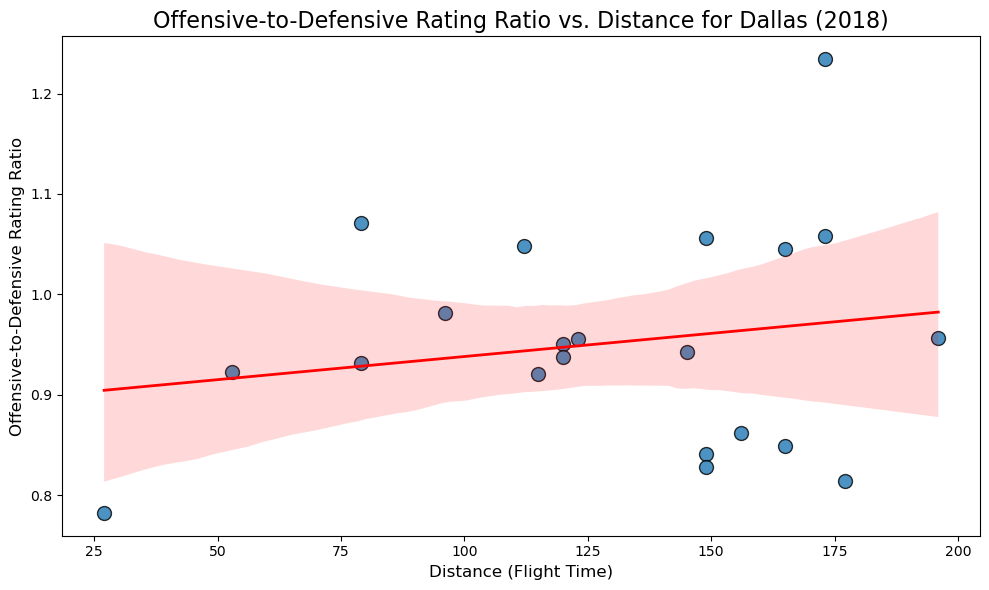

Regression results for Denver (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                   0.04685
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.831
Time:                        14:08:12   Log-Likelihood:                 5.9188
No. Observations:                  20   AIC:                            -7.838
Df Residuals:                      18   BIC:                            -5.846
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

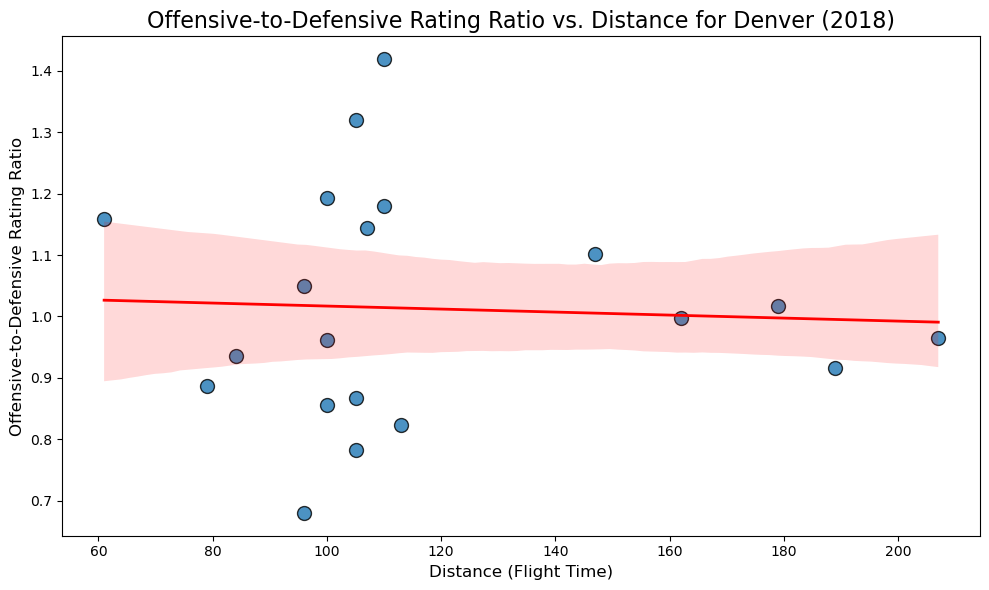

Regression results for Detroit (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.5139
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.482
Time:                        14:08:12   Log-Likelihood:                 7.1429
No. Observations:                  22   AIC:                            -10.29
Df Residuals:                      20   BIC:                            -8.104
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

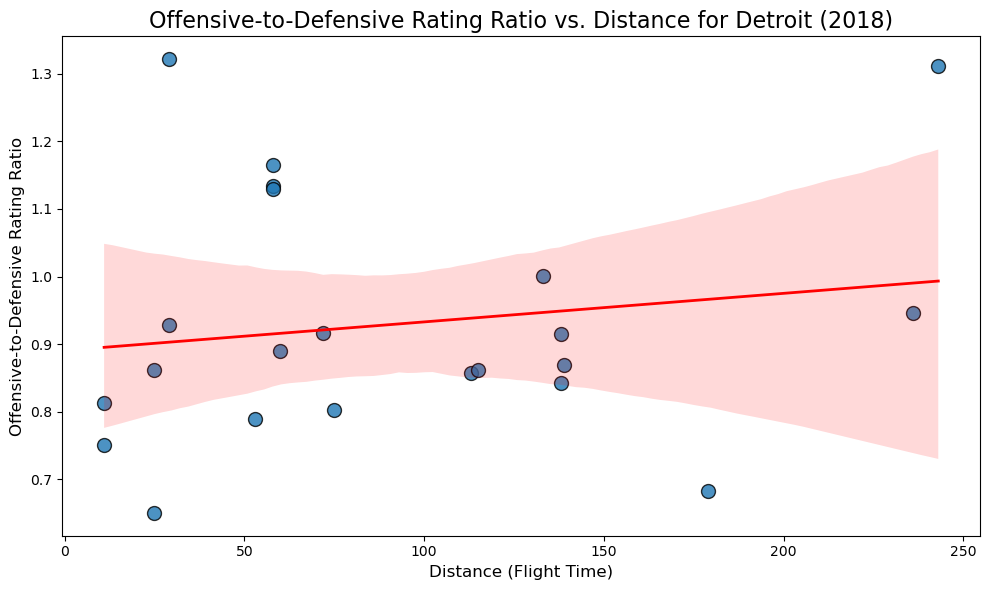

Regression results for Golden State (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.287
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.146
Time:                        14:08:13   Log-Likelihood:                 8.9567
No. Observations:                  22   AIC:                            -13.91
Df Residuals:                      20   BIC:                            -11.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

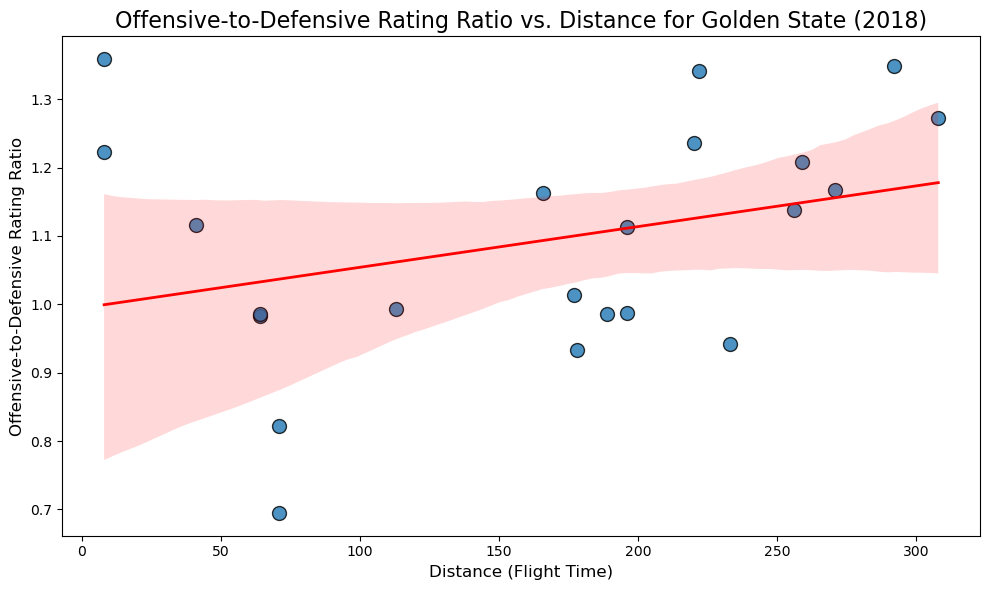

Regression results for Houston (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.599
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.219
Time:                        14:08:13   Log-Likelihood:                 9.2417
No. Observations:                  24   AIC:                            -14.48
Df Residuals:                      22   BIC:                            -12.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

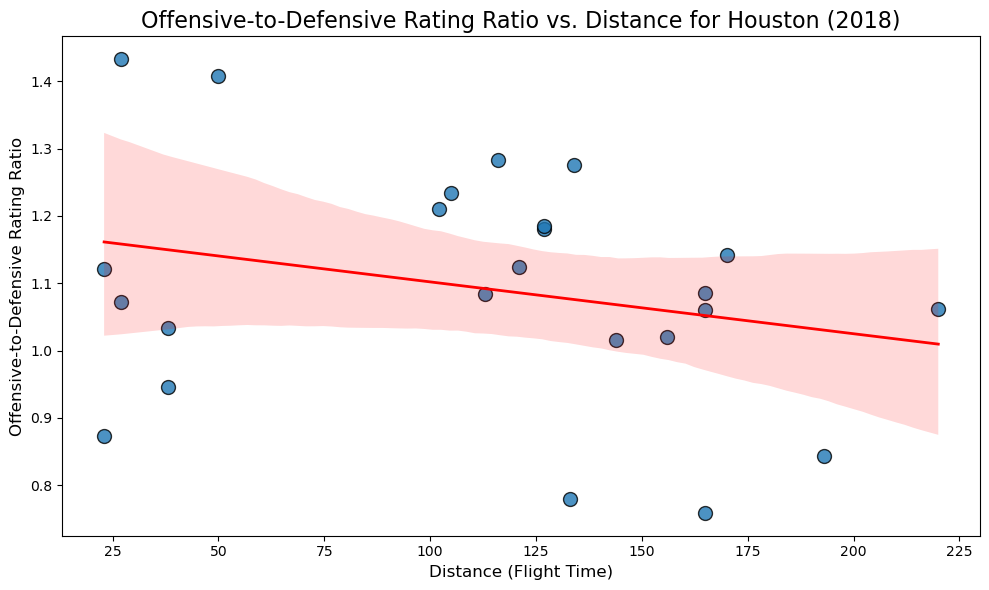

Regression results for Indiana (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.149
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.157
Time:                        14:08:13   Log-Likelihood:                 13.617
No. Observations:                  23   AIC:                            -23.23
Df Residuals:                      21   BIC:                            -20.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

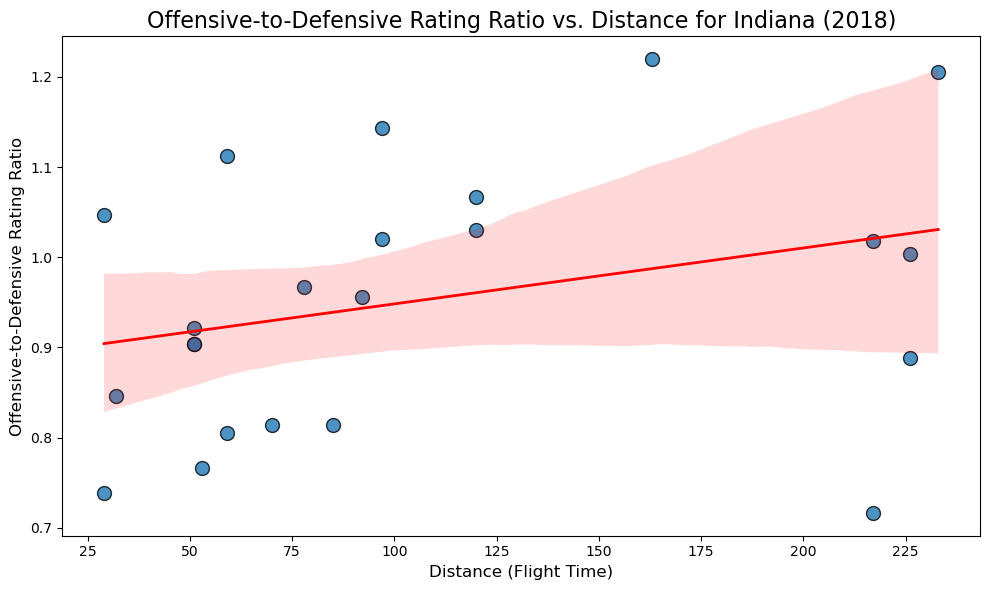

Regression results for LA Clippers (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     5.515
Date:                Fri, 20 Dec 2024   Prob (F-statistic):             0.0305
Time:                        14:08:14   Log-Likelihood:                 13.112
No. Observations:                  20   AIC:                            -22.22
Df Residuals:                      18   BIC:                            -20.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

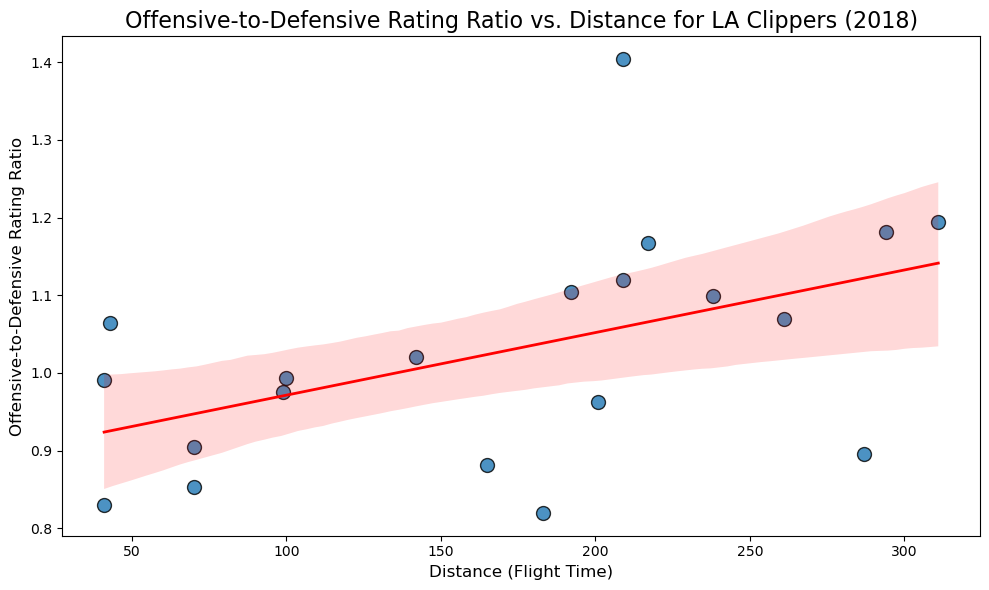

Regression results for LA Lakers (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.2621
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.614
Time:                        14:08:14   Log-Likelihood:                 12.364
No. Observations:                  23   AIC:                            -20.73
Df Residuals:                      21   BIC:                            -18.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

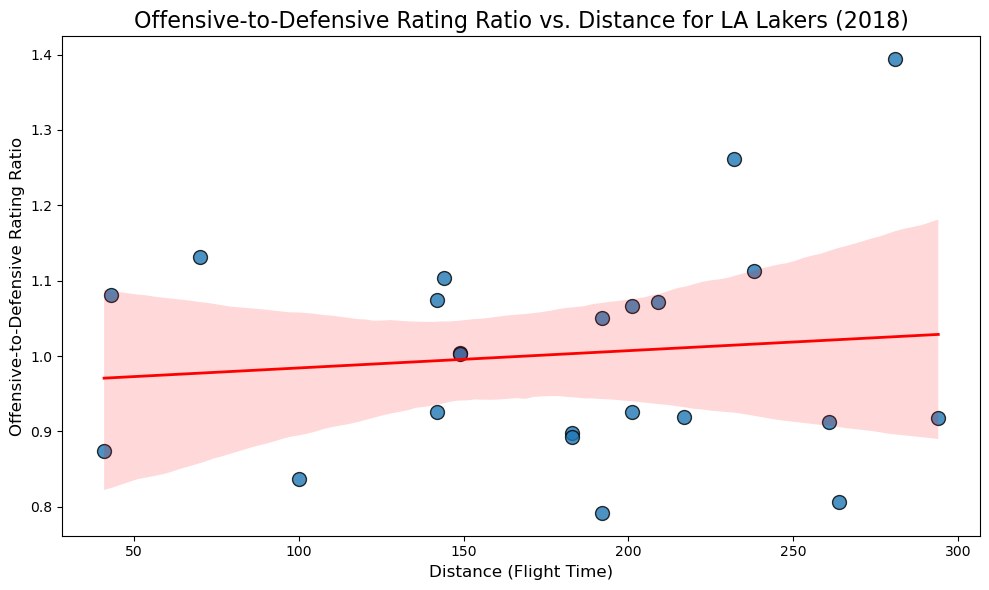

Regression results for Memphis (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.050
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.317
Time:                        14:08:15   Log-Likelihood:                 22.899
No. Observations:                  23   AIC:                            -41.80
Df Residuals:                      21   BIC:                            -39.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

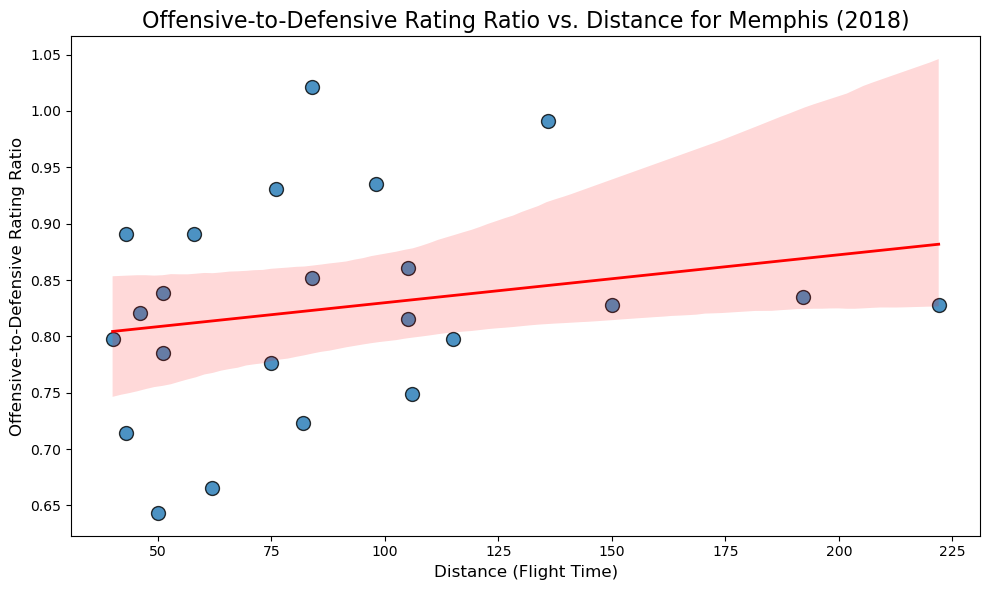

Regression results for Miami (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     5.594
Date:                Fri, 20 Dec 2024   Prob (F-statistic):             0.0282
Time:                        14:08:15   Log-Likelihood:                 15.788
No. Observations:                  22   AIC:                            -27.58
Df Residuals:                      20   BIC:                            -25.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

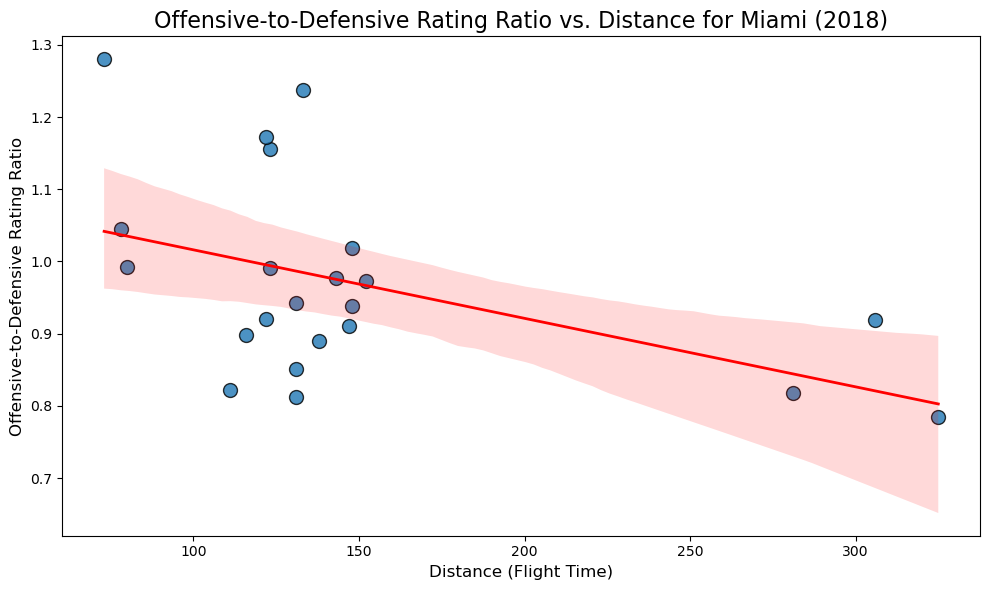

Regression results for Milwaukee (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9052
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.351
Time:                        14:08:15   Log-Likelihood:                 11.912
No. Observations:                  25   AIC:                            -19.82
Df Residuals:                      23   BIC:                            -17.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

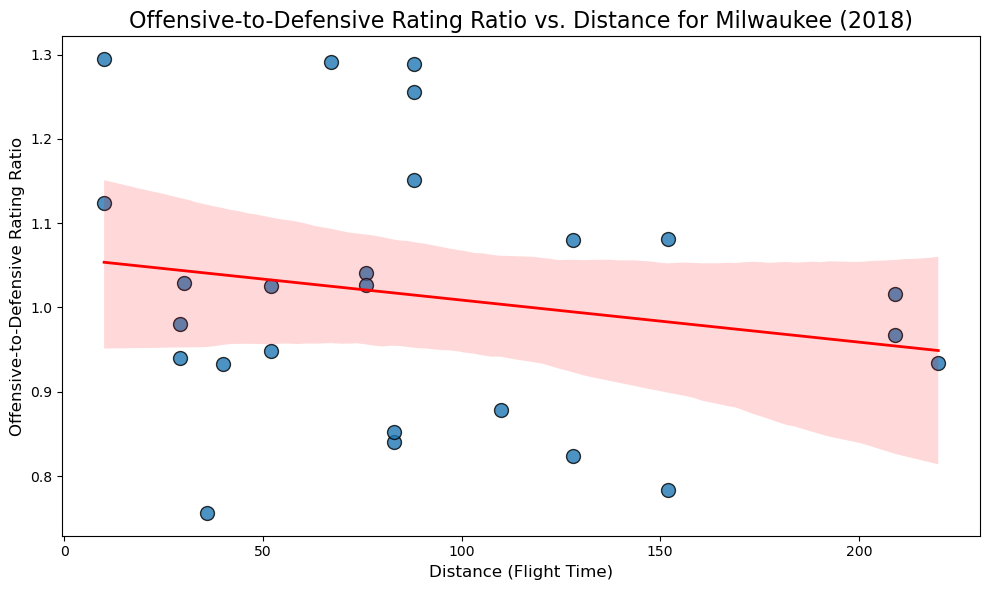

Regression results for Minnesota (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.1573
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.696
Time:                        14:08:16   Log-Likelihood:                 13.499
No. Observations:                  22   AIC:                            -23.00
Df Residuals:                      20   BIC:                            -20.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

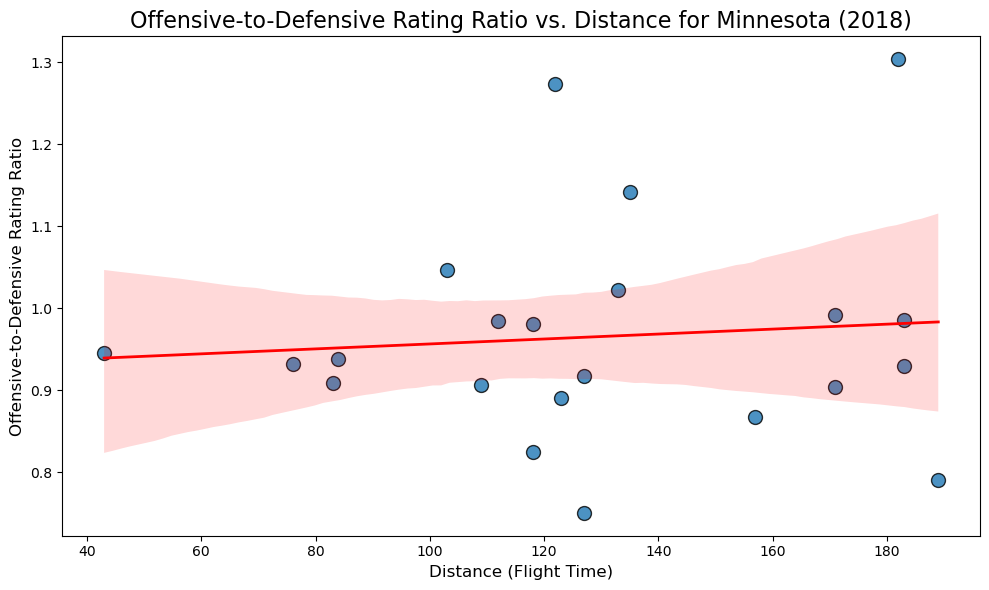

Regression results for New Orleans (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.124
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.302
Time:                        14:08:16   Log-Likelihood:                 15.305
No. Observations:                  22   AIC:                            -26.61
Df Residuals:                      20   BIC:                            -24.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

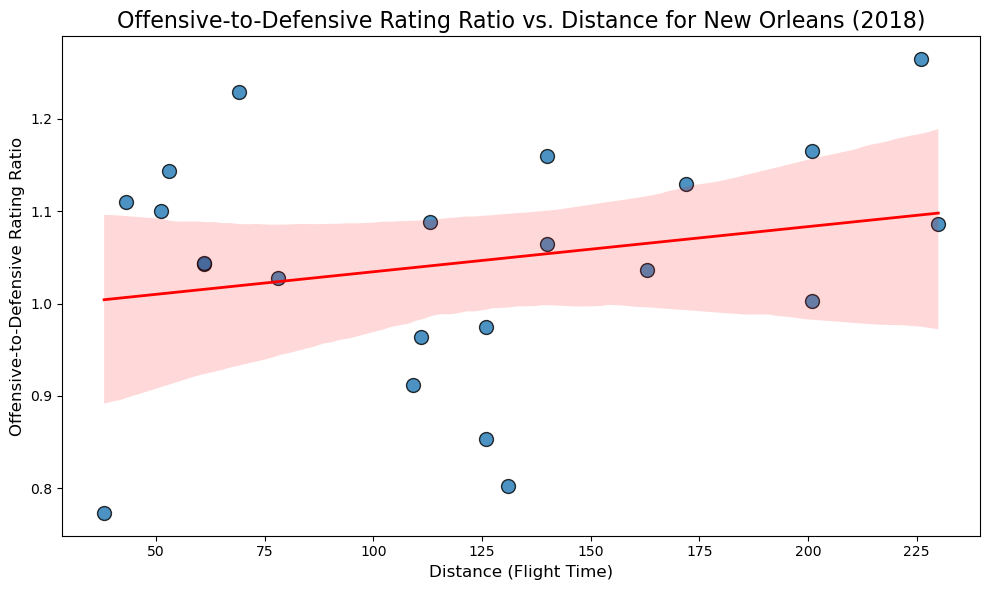

Regression results for New York (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                   0.08009
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.780
Time:                        14:08:17   Log-Likelihood:                 12.883
No. Observations:                  24   AIC:                            -21.77
Df Residuals:                      22   BIC:                            -19.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

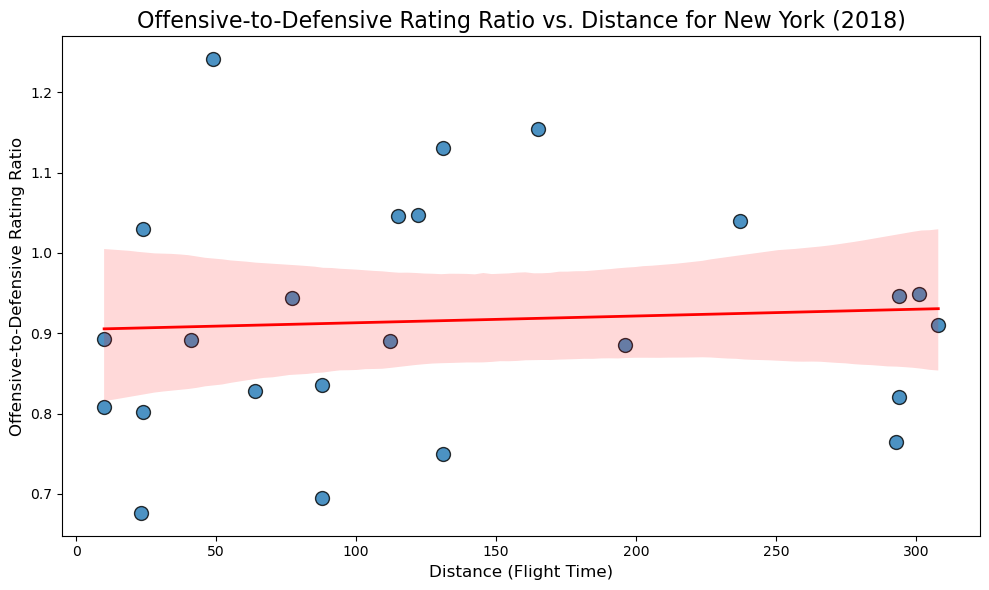

Regression results for Oklahoma City (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.2385
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.631
Time:                        14:08:17   Log-Likelihood:                 10.879
No. Observations:                  22   AIC:                            -17.76
Df Residuals:                      20   BIC:                            -15.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

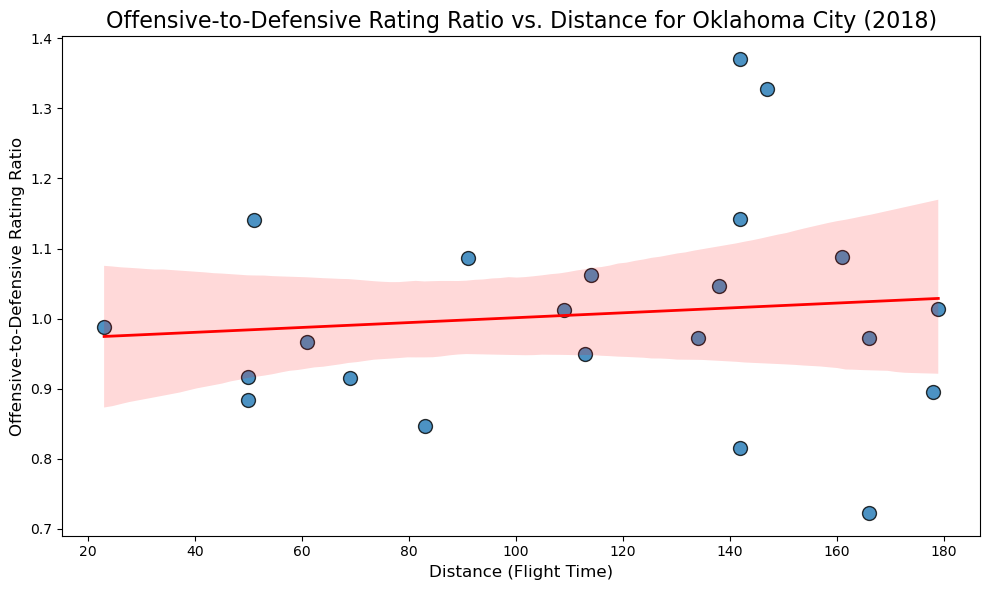

Regression results for Orlando (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.4880
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.493
Time:                        14:08:17   Log-Likelihood:                 11.199
No. Observations:                  21   AIC:                            -18.40
Df Residuals:                      19   BIC:                            -16.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

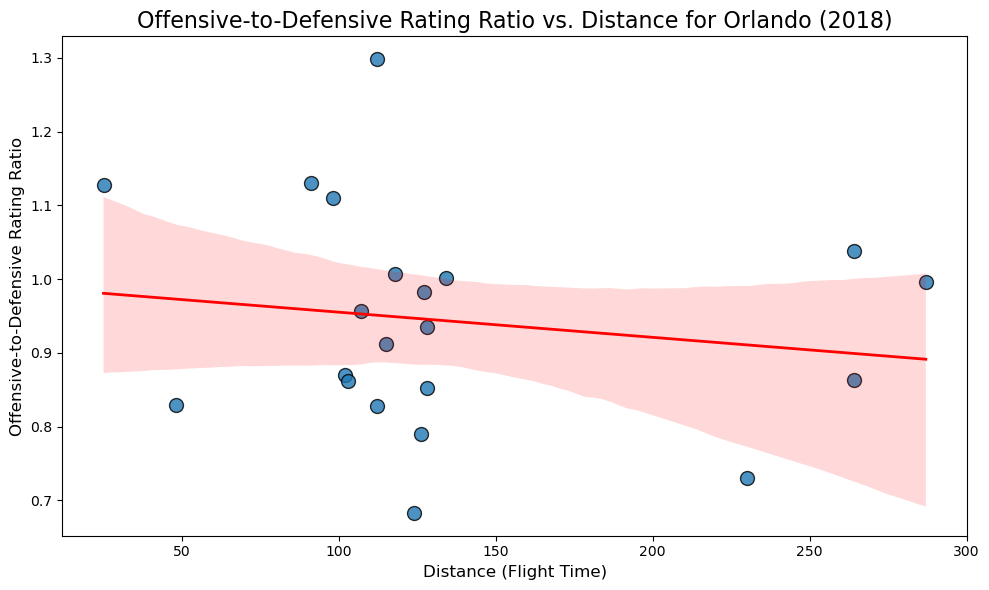

Regression results for Philadelphia (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.770
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.199
Time:                        14:08:18   Log-Likelihood:                 14.210
No. Observations:                  21   AIC:                            -24.42
Df Residuals:                      19   BIC:                            -22.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

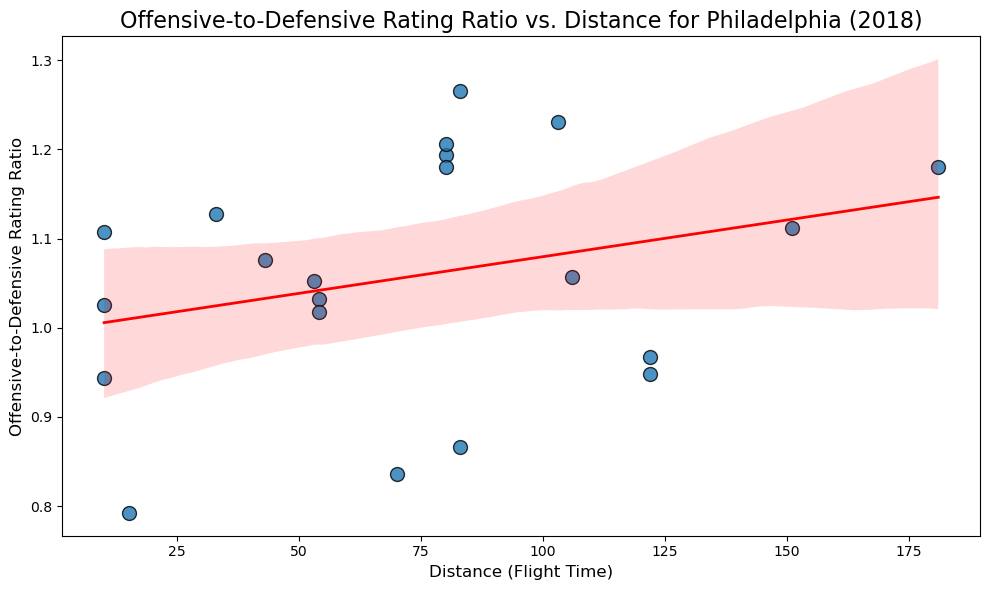

Regression results for Portland (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     3.440
Date:                Fri, 20 Dec 2024   Prob (F-statistic):             0.0778
Time:                        14:08:18   Log-Likelihood:                 14.278
No. Observations:                  23   AIC:                            -24.56
Df Residuals:                      21   BIC:                            -22.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

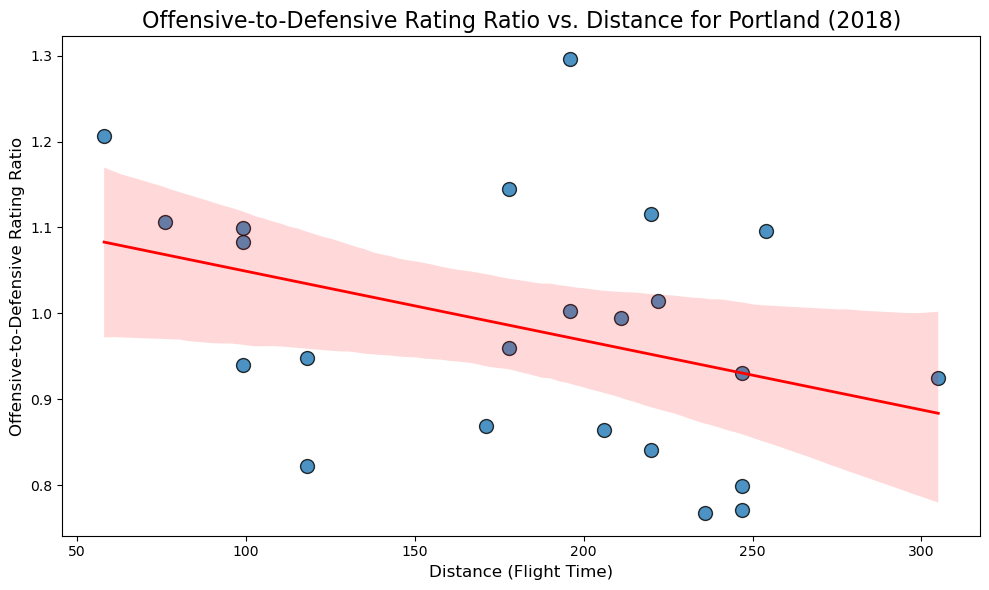

Regression results for Sacramento (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     4.967
Date:                Fri, 20 Dec 2024   Prob (F-statistic):             0.0388
Time:                        14:08:19   Log-Likelihood:                 23.390
No. Observations:                  20   AIC:                            -42.78
Df Residuals:                      18   BIC:                            -40.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

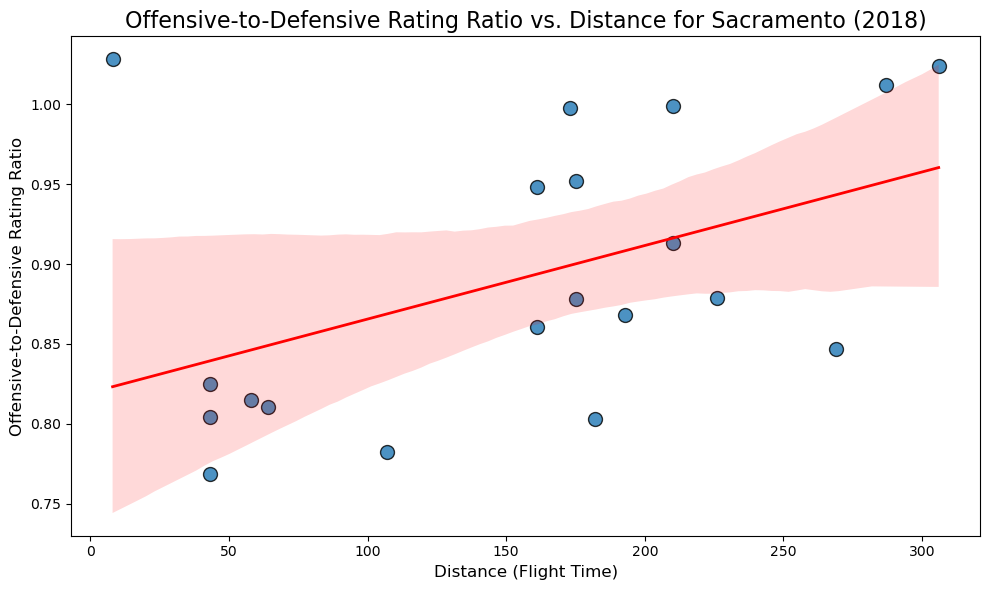

Regression results for San Antonio (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.3740
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.548
Time:                        14:08:19   Log-Likelihood:                 12.440
No. Observations:                  22   AIC:                            -20.88
Df Residuals:                      20   BIC:                            -18.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

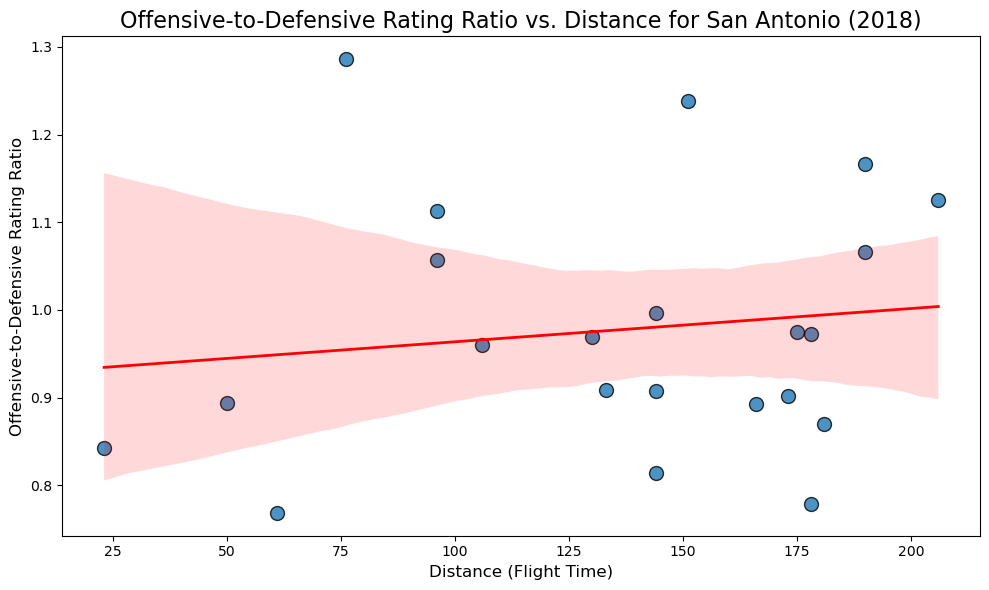

Regression results for Toronto (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     5.628
Date:                Fri, 20 Dec 2024   Prob (F-statistic):             0.0284
Time:                        14:08:20   Log-Likelihood:                 13.890
No. Observations:                  21   AIC:                            -23.78
Df Residuals:                      19   BIC:                            -21.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

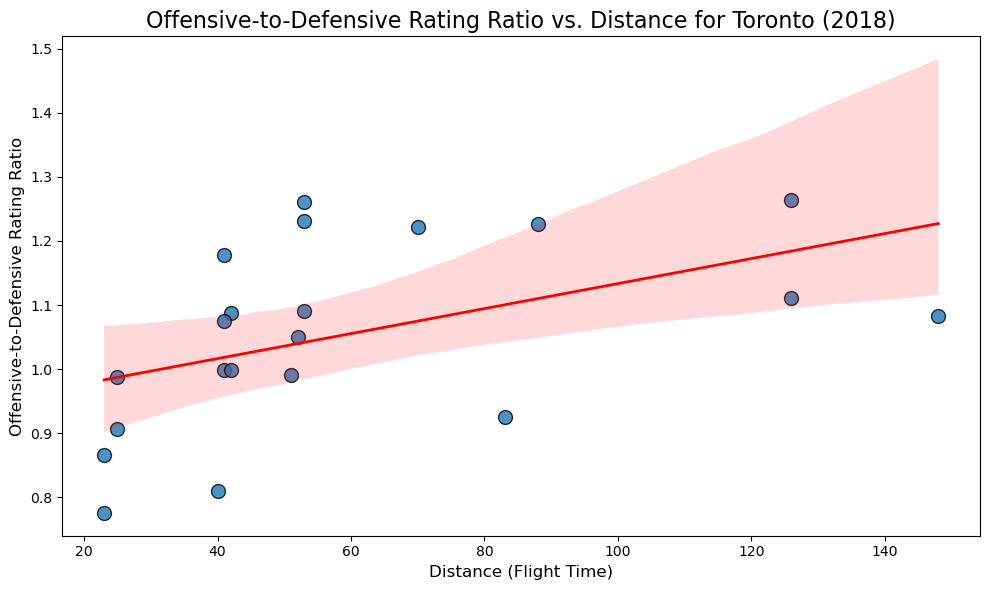

Regression results for Utah (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.5833
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.454
Time:                        14:08:20   Log-Likelihood:                 7.1637
No. Observations:                  22   AIC:                            -10.33
Df Residuals:                      20   BIC:                            -8.145
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1

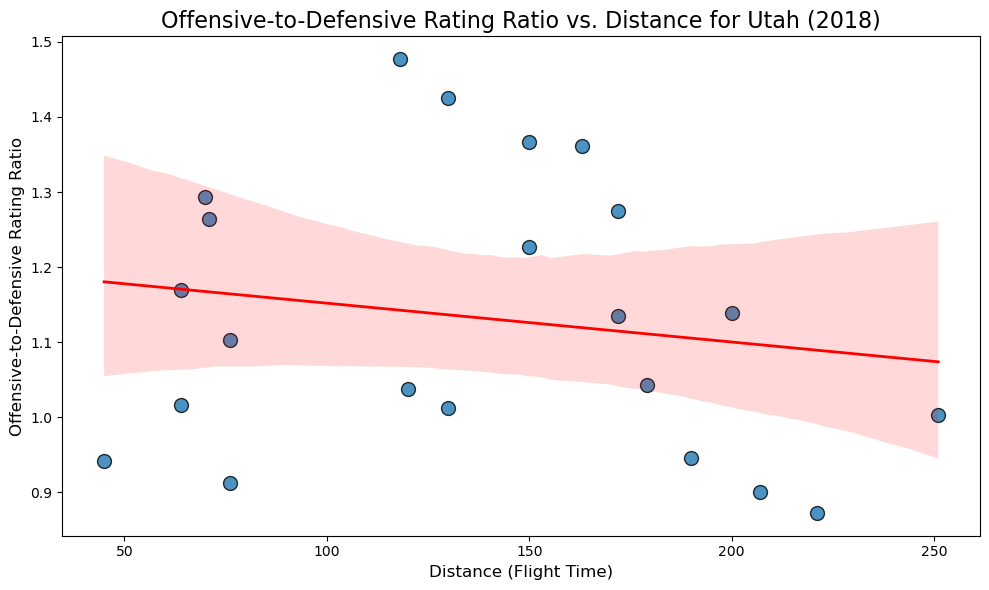

Regression results for Washington (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.4717
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.500
Time:                        14:08:21   Log-Likelihood:                 13.232
No. Observations:                  22   AIC:                            -22.46
Df Residuals:                      20   BIC:                            -20.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

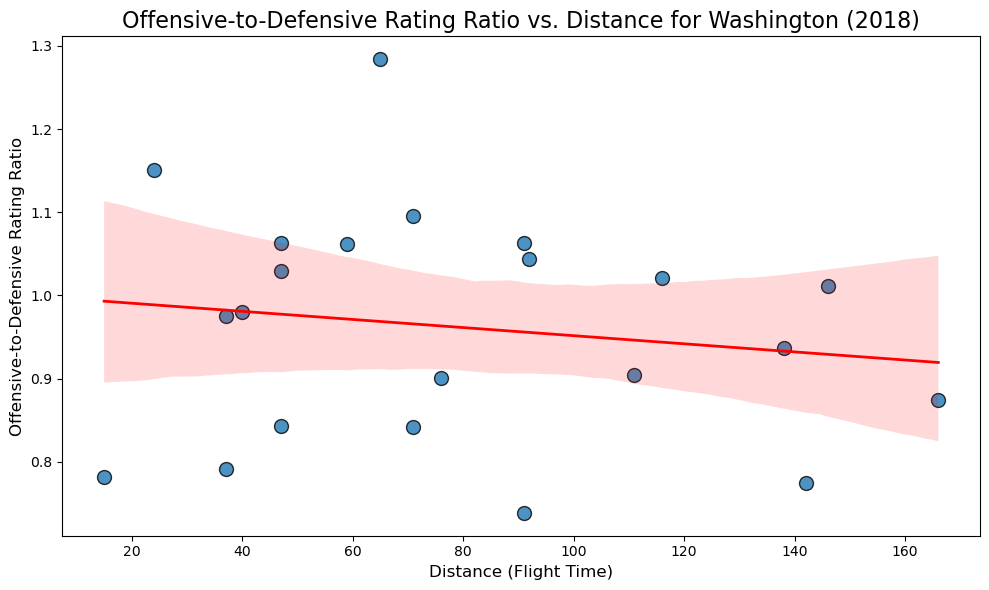

Regression results for all teams (2018):
                            OLS Regression Results                            
Dep. Variable:           OffDef_Ratio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8972
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.344
Time:                        14:08:21   Log-Likelihood:                 275.37
No. Observations:                 639   AIC:                            -546.7
Df Residuals:                     637   BIC:                            -537.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

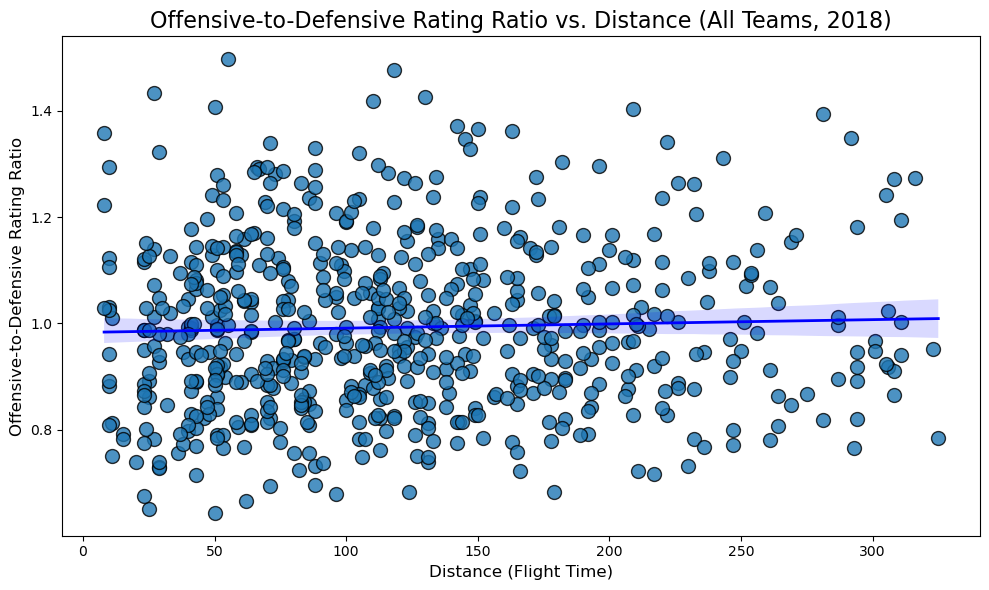

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

game['Date'] = pd.to_datetime(game['Date'], errors='coerce')
game_df_2018 = game[(game['Distance'] > 0) & (game['Date'].dt.year == 2018)]

# Calculate Offensive Rating (OffRtg) and Defensive Rating (DefRtg)
game_df_2018['Offensive Rating'] = (game_df_2018['TeamPoints'] / game_df_2018['FieldGoalsAttempted']) * 100
game_df_2018['Defensive Rating'] = (game_df_2018['OpponentPoints'] / game_df_2018['Opp.FieldGoalsAttempted']) * 100

# Create a metric: Offensive-to-Defensive Rating Ratio (OffRtg/DefRtg)
game_df_2018['OffDef_Ratio'] = game_df_2018['Offensive Rating'] / game_df_2018['Defensive Rating']

#2018
teams_2018 = game_df_2018['Full_Team'].unique()

for team in teams_2018:
    team_df = game_df_2018[game_df_2018['Full_Team'] == team]
    X = sm.add_constant(team_df['Distance'])
    y = team_df['OffDef_Ratio']
    
    model = sm.OLS(y, X).fit()
    
    print(f"Regression results for {team} (2018):")
    print(model.summary())
    
    plt.figure(figsize=(10, 6))
    sns.regplot(data=team_df, x='Distance', y='OffDef_Ratio', scatter_kws={'s': 100, 'edgecolor': 'black'}, line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'Offensive-to-Defensive Rating Ratio vs. Distance for {team} (2018)', fontsize=16)
    plt.xlabel('Distance (Flight Time)', fontsize=12)
    plt.ylabel('Offensive-to-Defensive Rating Ratio', fontsize=12)
    plt.tight_layout()
    plt.show()

X_all_2018 = sm.add_constant(game_df_2018['Distance'])
y_all_2018 = game_df_2018['OffDef_Ratio']
model_all_2018 = sm.OLS(y_all_2018, X_all_2018).fit()

print("Regression results for all teams (2018):")
print(model_all_2018.summary())

plt.figure(figsize=(10, 6))
sns.regplot(data=game_df_2018, x='Distance', y='OffDef_Ratio', scatter_kws={'s': 100, 'edgecolor': 'black'}, line_kws={'color': 'blue', 'linewidth': 2})
plt.title('Offensive-to-Defensive Rating Ratio vs. Distance (All Teams, 2018)', fontsize=16)
plt.xlabel('Distance (Flight Time)', fontsize=12)
plt.ylabel('Offensive-to-Defensive Rating Ratio', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

teams = game_df_2018['Full_Team'].unique()

for team in teams:
    team_df = game_df_2018[game_df_2018['Full_Team'] == team]
    corr, _ = pearsonr(team_df['Distance'], team_df['OffDef_Ratio'])
    print(f"Pearson correlation coefficient for {team}: {corr:.4f}")

corr_all, _ = pearsonr(game_df_2018['Distance'], game_df_2018['OffDef_Ratio'])
print(f"Pearson correlation coefficient for all teams (2018): {corr_all:.4f}")


Pearson correlation coefficient for Atlanta: -0.2647
Pearson correlation coefficient for Boston: 0.1733
Pearson correlation coefficient for Brooklyn: -0.1240
Pearson correlation coefficient for Charlotte: -0.1398
Pearson correlation coefficient for Chicago: 0.0204
Pearson correlation coefficient for Cleveland: -0.0989
Pearson correlation coefficient for Dallas: 0.1876
Pearson correlation coefficient for Denver: -0.0510
Pearson correlation coefficient for Detroit: 0.1583
Pearson correlation coefficient for Golden State: 0.3203
Pearson correlation coefficient for Houston: -0.2603
Pearson correlation coefficient for Indiana: 0.3047
Pearson correlation coefficient for LA Clippers: 0.4843
Pearson correlation coefficient for LA Lakers: 0.1110
Pearson correlation coefficient for Memphis: 0.2182
Pearson correlation coefficient for Miami: -0.4675
Pearson correlation coefficient for Milwaukee: -0.1946
Pearson correlation coefficient for Minnesota: 0.0883
Pearson correlation coefficient for New O